# KAN with Splines

We will use example provided in the official implementation of the KAN paper.
Install the library with

```pip install pykan```

**Function Fitting**
We will take some interesting test functions from [Wavelet Regression](https://github.com/jseabold/web-site/blob/master/content/notebooks/wavelet-regression-in-python.ipynb) notebook.

The Doppler function is 
$$
f(x) = \sqrt{x(1-x)} \sin(\frac{2.1\pi}{x+0.05}) \\
x \sim U[0,1]
$$


device is:  cpu
train input data shape torch.Size([1000, 1])
train label data shape torch.Size([1000, 1])


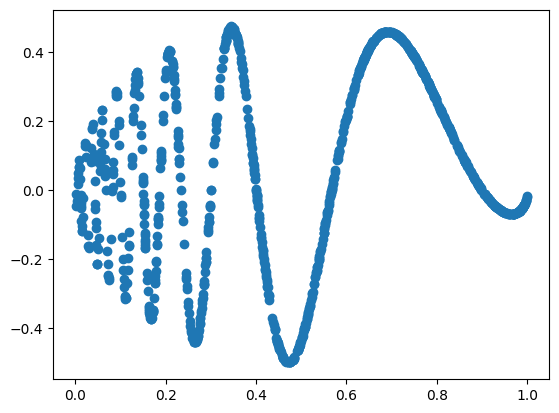

In [9]:
import torch
import matplotlib.pyplot as plt
import numpy as np

from kan.utils import create_dataset

torch.set_default_dtype(torch.float64)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('device is: ',device)

f = lambda x: torch.sqrt(x[:,[0]]*(1-x[:,[0]]))*torch.sin((2*np.pi)/(x[:,[0]]+.1))

dataset = create_dataset(f, n_var=1, device=device, ranges=[0,1])

print('train input data shape', dataset['train_input'].shape)
print('train label data shape', dataset['train_label'].shape)

plt.scatter(dataset['train_input'],dataset['train_label'])

checkpoint directory created: ./model
saving model version 0.0


| train_loss: 8.76e-02 | test_loss: 9.21e-02 | reg: 7.97e+00 | : 100%|█| 50/50 [00:09<00:00,  5.53it


saving model version 0.1


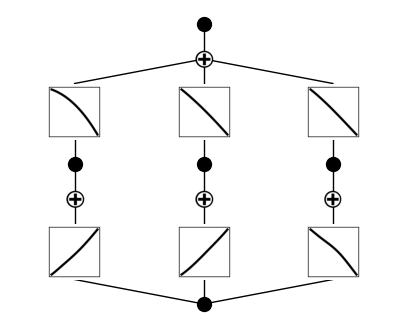

In [10]:
# create a KAN: 1D inputs, 1D output, and 5 hidden neurons. cubic spline (k=3), 5 grid intervals (grid=5).
from kan import KAN
model = KAN(width=[1,3,1], grid=5, k=3, seed=0, device=device)

# plot KAN at initialization
model(dataset['train_input'])
model.plot()

# train the model
model.fit(dataset, opt="LBFGS", steps=50, lamb=0.001);

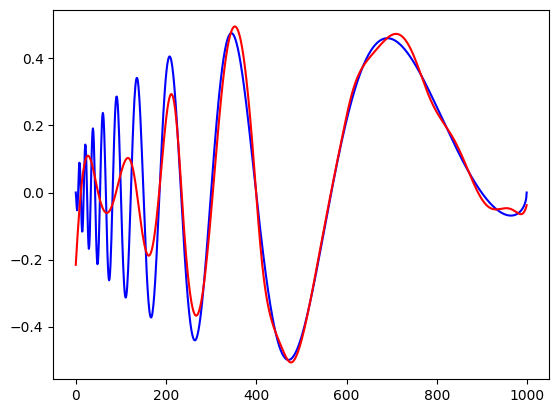

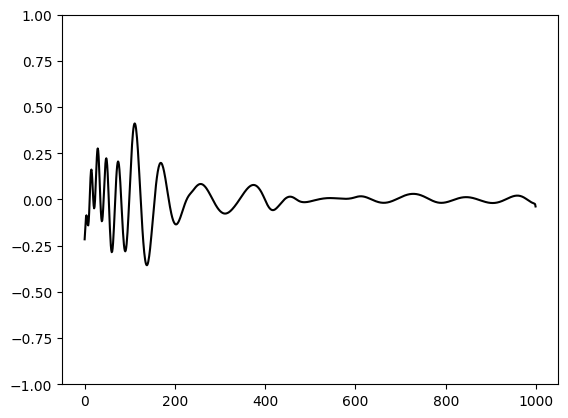

In [11]:
# let us look at the recontruction
X = dataset['train_input']
n  = 1000
X[:,0] = torch.linspace(0,1,steps=n)
y = f(X)
y = y[:,0].detach().numpy()
yh = model.forward(X)

yh = yh[:,0].detach().numpy()
plt.plot(y,color='blue')
plt.plot(yh, color='red')
plt.show()
plt.plot(yh-y, color='black')
plt.ylim(-1,1)
plt.show()